#**Solucion de ecuanciones diferenciales ordinarias**

In [55]:
#importamos las librerias
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

#**Actividad** **1**

Resuelver la ecuación diferencial del oscilador de Van der Pol:
$$\dfrac{d^2x}{dt^2}-\mu(1-x^2)\dfrac{dx}{dt}+x=0$$

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.
Hacemos un cambio de variable:
$$v=\dfrac{dx}{dt}$$
Reescriviendo tenemos
$$\dfrac{dv}{dt}-\mu(1-x^2)v+x=0$$

Pasamos del otro lado todo depenjando $dv/dt$.
$$\dfrac{dv}{dt}=\mu(1-x^2)-x$$

Resuelveremo el caso para $\mu=0,1,2,3,4$ y grafique las soluciones para un tiempo de integración de $t=[0,50]$


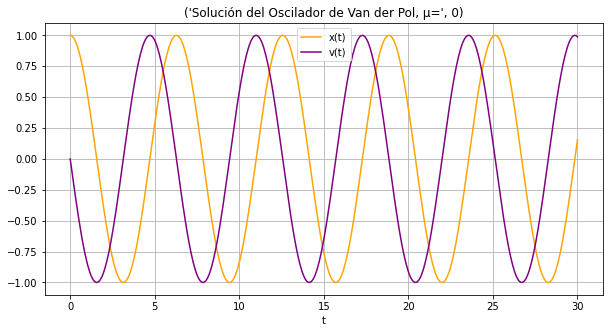

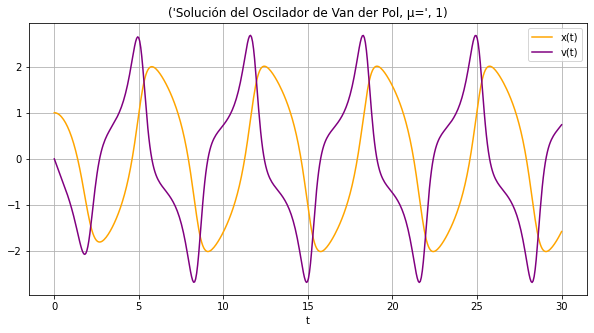

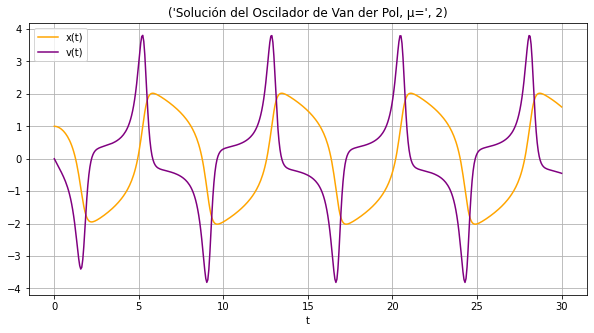

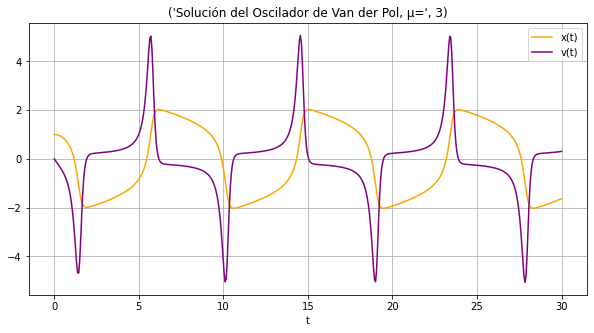

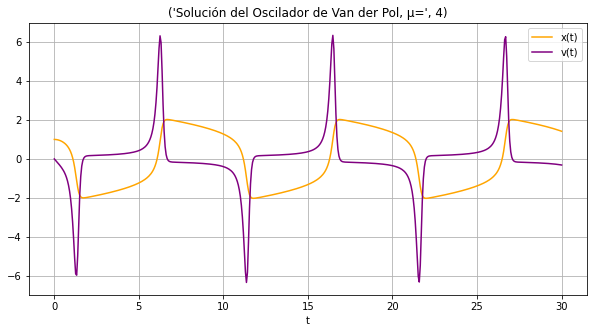

In [56]:
#Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
def VanderPol(y,t,mu):
        x, v = y
        z = [v, mu*(1 - x**2)*v - x]
        return z

#Definimos las condiciones iniciales 
t_0 = 0.0
y_0 = [1.0, 0.0]
v_0 = [2.0,0.0]

#Definimos el paso de integración h=(tmax-t0)/Npts
t0=0
tmax=30
Npts=500

#Definimos el tiempo de integración
t = np.linspace(t0,tmax,Npts) 

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-10
relerr = 1.0e-8

for mu in range(5):
  sol=odeint(VanderPol, y_0, t, args=(mu,), atol=abserr, rtol=relerr)
  # Posicion x(t)
  y1=sol[:,0]
  # Velocidad v(t)
  y2=sol[:,1] 
  #Definimos las dimensiones de nuestra grafica
  plt.figure(figsize=(10,5))
  plt.plot(t, y1, color=("orange"), label=('x(t)'))
  plt.plot(t, y2, color=("purple"), label=('v(t)'))
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol, μ=',mu))
  plt.xlabel('t')
  plt.grid()
  plt.show()

#**Actividad** **2**
Siguiendo con el ejemplo anterior del oscilador de **Van der Pol**, reproduce la gráfica del plano fase $( \theta, \omega)$ que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo.


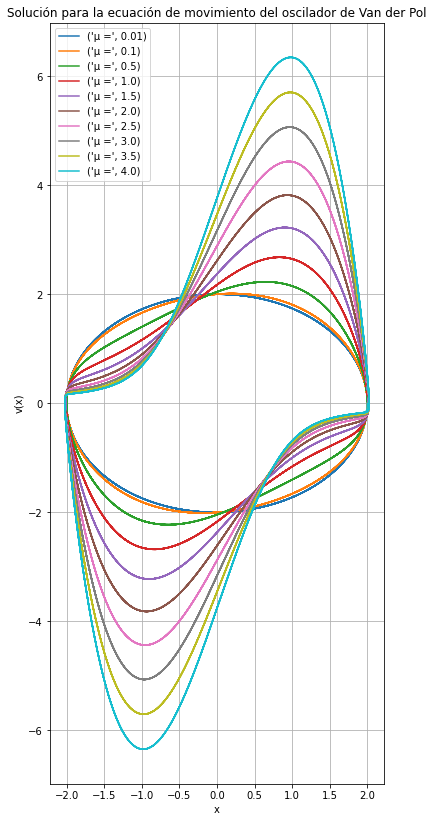

In [57]:
#Definimos el tiempo de integración
t = np.linspace(0, 50, 100000)

#Definimos los valores de mu a utilizar
mu = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

#Calculamos los valores y graficamos
plt.figure(figsize=(6, 14))
for i in range(10):
  results = odeint(VanderPol, v_0, t, args=(mu[i],), atol=abserr, rtol=relerr)
  x_t = results[:,0]
  v_t = results[:,1]
  plt.plot(x_t, v_t, label=("μ =", mu[i]))
plt.legend(loc='best')
plt.title('Solución para la ecuación de movimiento del oscilador de Van der Pol')
plt.xlabel('x')
plt.ylabel('v(x)')
plt.grid()
plt.show()

#**Actividad** **3**
Encuentrar las soluciones de las siguientes ecuaciones diferenciales, utilizando los métodos:

* **Método de Euler**

* **Método de Runge-Kutta RK4**

* Función **scipy.integrate.odeint** ó con la funcion **scipy integrate-solve_ivp**

**Actividad 3.1 ~ Metodo de Euler**

$$\dfrac{d^2x}{dt^2}+k(\dfrac{dx}{dt})^2-g=0$$
\

$$x(0)=0,\dfrac{dx}{dt}(0)=0$$

$$k>0$$

Hacemos un cambio de varible y reescribimos:

$$v=\dfrac{dx}{dt}$$

Por lo tanto 

$$\dfrac{dv}{dt}+k(v)^2-g=0$$

De aqui despejamos $dv/dt$

$$\dfrac{dv}{dt}=-k(v)^2+g$$

In [71]:
#Definimos la funcion
def odeEuler(y, t, k, g):
        x, v = y
        z = [v, -k*v**2 + g]
        return z

#Definimos nuestras condiciones iniciales y las constantes
t_0 = 0.0
x_0 = 0.0
v_0 = 0

k = 1
g = 9.81
 
#Definimos el tiempo de integración
t0=0
tmax=30
Npts=500
t = np.linspace(t0, tmax, Npts)

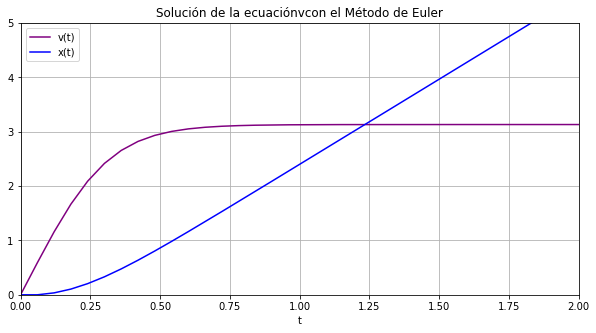

In [72]:
#Para la ecuación
f = lambda v,t: -k*v**2 + g 

#Vector cero para la velocidad
v = np.zeros(len(t))
v[0] = v0

#Vector cero para la posición
x = np.zeros(len(t))
x[0] = x0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

plt.figure(figsize=(10,5))
plt.plot(t,v,'purple', t,x,'blue')
plt.legend(['v(t)', 'x(t)'])
plt.axis([0,2,0,5])
plt.title('Solución de la ecuaciónvcon el Método de Euler')
plt.xlabel('t')
plt.grid()
plt.show()

**Actividad 3.2 ~ Metodo de Runge-Kjutta RK4**



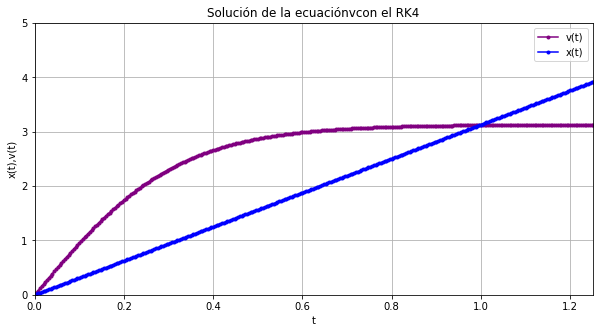

In [74]:
def RK4(f, x_0, y_0, h):
   
    k_0 = f(x_0, y_0)
    k_1 = f(x_0 + h/2, y_0 + h/2 * k_0)
    k_2 = f(x_0 + h/2, y_0 + h/2 * k_1)
    k_3 = f(x_0 + h, y_0 + h * k_2)

    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)

    x_1 = x_0 + h
    y_1 = y_0 + h * k

    return x_1, y_1

# Definimos la parte derecha de la ecuación para la velocidad
def f(t, v):
    return (-k*v**2+g)

# Condiciones iniciales
t_0 = 0.0
y_0 = 0.0

# Paso de integración h
a = 0
b = 2.0 
Npts = 500
h = (b-a)/Npts

t_values = [t_0]
y_values = [y_0]

# Calcula la solución con RK4
t = t_0
y = y_0

for _ in range(Npts):
  t, y = RK4(f, t, y, h)
  t_values.append(t)
  y_values.append(y)

# Definimos la parte derecha de la ecuación para la posicion
def f(T, x):
    return (y)

# Condiciones iniciales
T_0 = 0.0
x_0 = 0.0

# Paso de integración h
a = 0
b = 2.0 
Npts = 500
h = (b-a)/Npts

T_values = [T_0]
x_values = [x_0]

# Calcula la solución con RK4
T = T_0
x = x_0

for _ in range(Npts):
  T, x = RK4(f, T, x, h)
  T_values.append(T)
  x_values.append(x)


plt.figure(figsize=(10,5))
plt.plot(t_values,y_values,"r.-", label="v(t)",color="purple")
plt.plot(T_values,x_values,"b.-", label="x(t)",color="blue")
plt.legend()
plt.axis([0,1.25,0,5])
plt.title("Solución de la ecuaciónvcon el RK4")
plt.xlabel("t")
plt.ylabel("x(t),v(t)")
plt.grid()
plt.show()

**Actividad 3.3 ~ Funcion scipy integrate-solve_ivp***

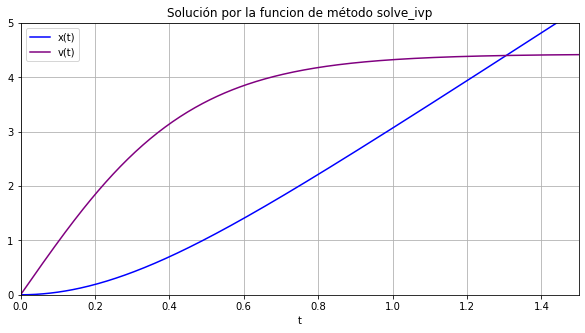

In [82]:
# Defnimos condiciones iniciale
k=0.5

#Definimos la funcion
def fsi_ivp(t,y,k):
      z = [y[1], - k*y[1]**2 + g ]
      return z


# Definimos las condiciones iniciales 
t_0 = 0.0
y_0 = [0.0, 0.0]

#Definimos el tiempo de integración
t0=0
tmax=2.0
Npts=500
t = np.linspace(t0,tmax,Npts)

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

#Calculamos los valores y graficamos
sol = solve_ivp(lambda t, y, mu: fsi_ivp(t, y, k),(t0,tmax), y0=y_0, method='RK45', t_eval=t, args=(k,), rtol=relerr, atol=abserr)
y1=sol.y[0]
y2=sol.y[1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'b', label="x(t)",color="blue")
plt.plot(t, y2, 'g', label='v(t)',color="purple")
plt.legend(loc='best')
plt.axis([0,1.5,0,5])
plt.title('Solución por la funcion de método solve_ivp')
plt.xlabel('t')
plt.grid()
plt.show()